In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 학습 데이터와 검증 데이터로 나누는 함수
from sklearn.model_selection import train_test_split

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import  XGBRegressor

# 머신러닝 알고리즘 - 군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 머신러닝 알고리즘 - 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 딥러닝 알고리즘 
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

# 저장
import pickle

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 10,8          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

### 데이터 가져오기

In [2]:
df1 = pd.read_csv('../dataset/iris.csv', header= None)
df1.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


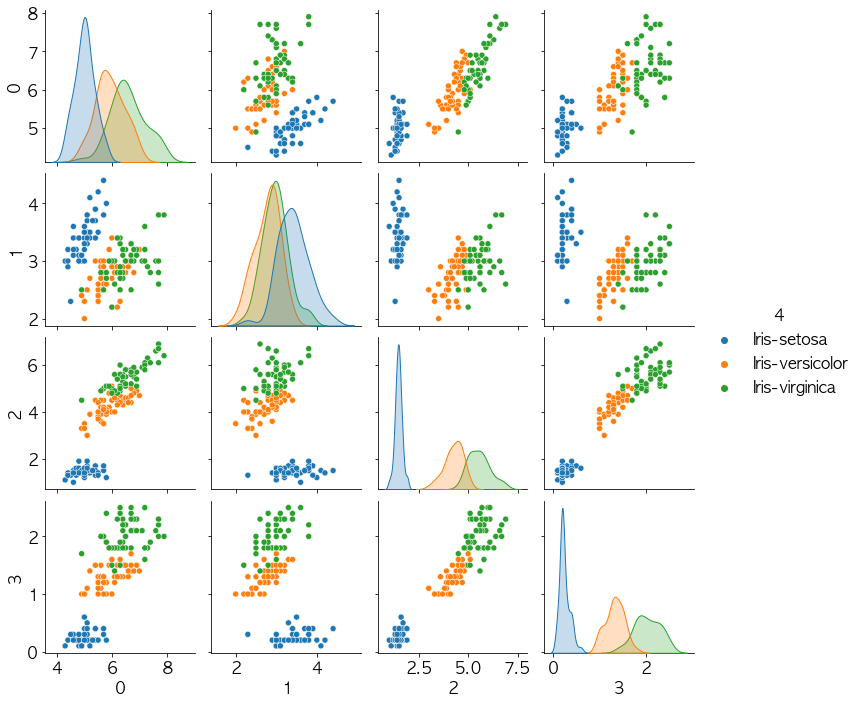

In [3]:
sns.pairplot(df1, hue=4)
plt.show()

### 입력과 결과 데이터 나누기

In [4]:
# 2진 분류 테스트를 위해
df1 = df1[:100]

x1 = df1.drop(4, axis=1)
y1 = df1[4]

display(x1)
display(y1)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: 4, Length: 100, dtype: object

### 인코더

In [5]:
encoder1 = LabelEncoder()
encoder1.fit(y1)
y1 = encoder1.transform(y1)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### 학습데이터와 검증데이터로 나누기

In [6]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1,y1)

### 머신러닝 모델 학습

In [7]:
model1 = LogisticRegression()
model1.fit(train_x1, train_y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# 예측결과
pred1 = model1.predict(test_x1)
pred1

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [9]:
# 평가
r1 = accuracy_score(test_y1, pred1)
r1

1.0

### 딥러닝

In [10]:
model2 = Sequential()
model2.add(Dense(30, input_dim=4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [11]:
# 딥러닝 알고리즘은 기본적으로 2진 분류를 수행하기 때문에
# 다수의 결과를 가지고 있는 데이터를 학습하면 오류가 발생

model2.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['accuracy'])
model2.fit(train_x1, train_y1, epochs=30, batch_size=10)

Epoch 1/30
8/8 [==============================] - 0s 828us/step - loss: 0.1035 - accuracy: 1.0000
Epoch 2/30
8/8 [==============================] - 0s 665us/step - loss: 0.0850 - accuracy: 1.0000
Epoch 3/30
8/8 [==============================] - 0s 851us/step - loss: 0.0761 - accuracy: 1.0000
Epoch 4/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 1.0000
Epoch 5/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 1.0000
Epoch 6/30
8/8 [==============================] - 0s 1ms/step - loss: 0.0481 - accuracy: 1.0000
Epoch 7/30
8/8 [==============================] - 0s 711us/step - loss: 0.0419 - accuracy: 1.0000
Epoch 8/30
8/8 [==============================] - 0s 845us/step - loss: 0.0377 - accuracy: 1.0000
Epoch 9/30
8/8 [==============================] - 0s 645us/step - loss: 0.0338 - accuracy: 1.0000
Epoch 10/30
8/8 [==============================] - 0s 965us/step - loss: 0.0270 - accuracy: 1.0000
Epoch 11/30
8/8 [========

In [12]:
# 예측결과 (예측 결과값이 1일 확률)
pred2 = model2.predict(test_x1)
pred2

array([[0.03727388],
       [0.06569594],
       [0.9498529 ],
       [0.96282864],
       [0.02975494],
       [0.92781436],
       [0.16080552],
       [0.8316773 ],
       [0.0834778 ],
       [0.8571441 ],
       [0.04000509],
       [0.9348633 ],
       [0.91706455],
       [0.9611705 ],
       [0.9637939 ],
       [0.05798602],
       [0.06687239],
       [0.93561673],
       [0.06759301],
       [0.8640886 ],
       [0.9395337 ],
       [0.9646071 ],
       [0.06967324],
       [0.06846103],
       [0.9658885 ]], dtype=float32)

In [13]:
# 예측결과 확인 
result2 = (pred2 >= 0.5).astype(int)
result2

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

In [14]:
r2 = accuracy_score(test_y1, result2)
r2

1.0